# Sentiment Analysis

**Objectives:**\
In this notebook we will be doing sentiment analysis using two different techniques:
- VADER (Valence Aware Dictionary and sEntiment Reasoner)
- Roberta Pretrained Model
- Comparative Analysis of VADER and RoBERTa

**Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

**Load**\
**About this dataset :** food reviews Amazon users

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path='/content/drive/MyDrive/Reviews/Reviews.csv'

In [ ]:
df = pd.read_csv(path)
print(df.shape)

(568454, 10)


In [ ]:
df=df.sample(n=500)
print(df.shape)
df.head()

(500, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
567133,567134,B0000D9MYM,A3RUST0G205O3L,J. Brown,2,2,5,1204588800,"Smells like feet, tastes like heaven",My girlfriend loves aged gouda and I'm a fan t...
224536,224537,B000EQT574,ALL51PH9IIA5X,Pamela Jo Stamper,0,0,3,1311552000,"Garden of Eatin' Tortilla Chips, Blue, No Salt...","This is a good product, BUT, buy the larger ba..."
35937,35938,B000LKXJEI,AJ7UVZ40J5S7C,N. Kastner,0,0,5,1246492800,Seriously Delish!,WOW! This product is simply delicious. Nice te...
250802,250803,B002HFWNKG,A1DVREQ7QXN75S,S. Z. Bishop,0,0,5,1269734400,Best Fat Free Hot Cocoa Mix ever!!,Was able to purchase this item in grocery stor...
170149,170150,B004ANA3DM,A3SOJ4VNO8DT1A,"S. Kilborn ""Sllky""",0,0,5,1329523200,Giving your dog the best!,My son and daughter-in-law adopted a rescued S...


**EDA**

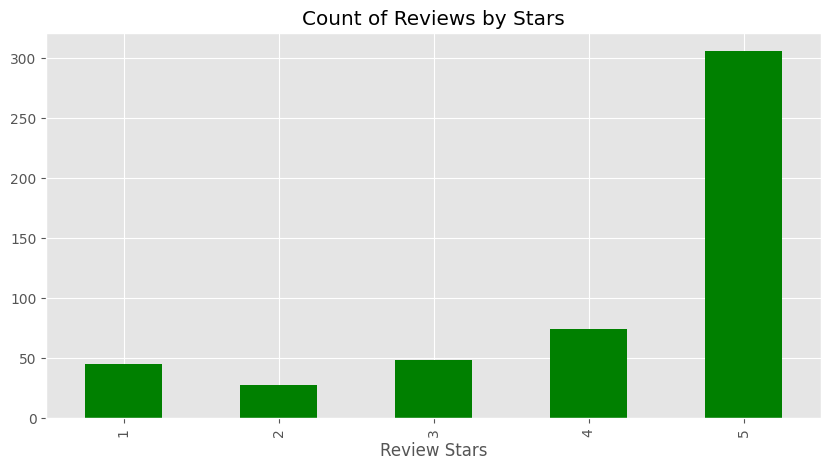

In [ ]:
countData=df['Score'].value_counts().sort_index()
countData.plot(kind='bar', figsize=(10, 5),color='g')
plt.title('Count of Reviews by Stars')
plt.xlabel('Review Stars')
plt.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**VADER Seniment Scoring**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sa = SentimentIntensityAnalyzer()

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
567133,567134,B0000D9MYM,A3RUST0G205O3L,J. Brown,2,2,5,1204588800,"Smells like feet, tastes like heaven",My girlfriend loves aged gouda and I'm a fan t...
224536,224537,B000EQT574,ALL51PH9IIA5X,Pamela Jo Stamper,0,0,3,1311552000,"Garden of Eatin' Tortilla Chips, Blue, No Salt...","This is a good product, BUT, buy the larger ba..."
35937,35938,B000LKXJEI,AJ7UVZ40J5S7C,N. Kastner,0,0,5,1246492800,Seriously Delish!,WOW! This product is simply delicious. Nice te...
250802,250803,B002HFWNKG,A1DVREQ7QXN75S,S. Z. Bishop,0,0,5,1269734400,Best Fat Free Hot Cocoa Mix ever!!,Was able to purchase this item in grocery stor...
170149,170150,B004ANA3DM,A3SOJ4VNO8DT1A,"S. Kilborn ""Sllky""",0,0,5,1329523200,Giving your dog the best!,My son and daughter-in-law adopted a rescued S...


In [ ]:
review_exemple = df['Text'][224536]
print(review_exemple)
sa.polarity_scores(review_exemple)

This is a good product, BUT, buy the larger bags.  They are the better value.  These are excellent for anyone who must limit their salt intake.


{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9319}

**Run the polarity score on the entire dataset**

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    text = row['Text']
    myid = row['Id']
    res[myid] = sa.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
vaders_result = pd.DataFrame(res).T
vaders_result = vaders_result.reset_index().rename(columns={'index': 'Id'})
vaders_result = vaders_result.merge(df[['Id','Score','Text']], how='left')
vaders_result.head()

,Id,neg,neu,pos,compound,Score,Text
0,567134,0.000,0.691,0.309,0.9886,5,My girlfriend loves aged gouda and I'm a fan t...
1,224537,0.000,0.601,0.399,0.9319,3,"This is a good product, BUT, buy the larger ba..."
2,35938,0.068,0.797,0.135,0.8336,5,WOW! This product is simply delicious. Nice te...
3,250803,0.000,0.830,0.170,0.8122,5,Was able to purchase this item in grocery stor...
4,170150,0.000,0.738,0.262,0.9545,5,My son and daughter-in-law adopted a rescued S...


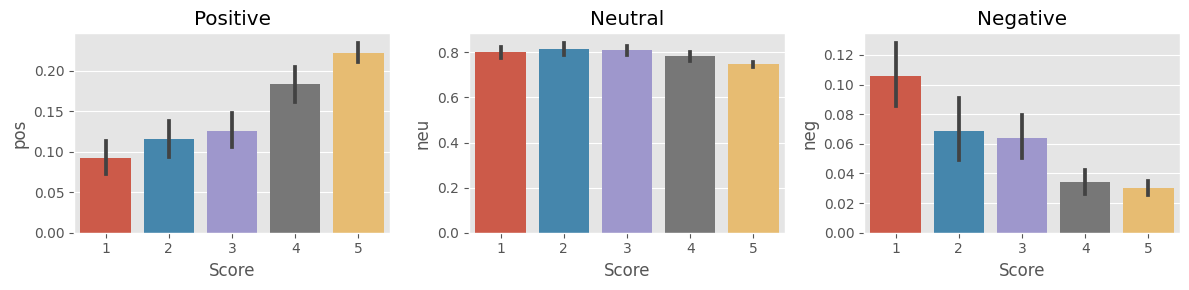

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_result, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_result, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders_result, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Roberta Pretrained Model**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
encoded_text = tokenizer(review_exemple, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.004349484, 'roberta_neu': 0.043321356, 'roberta_pos': 0.9523292}


In [ ]:
def roberta_function(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res2 = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        myid = row['Id']
        text = row['Text']
        roberta_result = roberta_function(text)
        res2[myid] = roberta_result
    except RuntimeError:
        print(f'id: {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

id: 235723
id: 266053
id: 532331
id: 175257


**Comparative Analysis of VADER and RoBERTa**

In [ ]:
r=pd.DataFrame(res2).T
r= r.reset_index().rename(columns={'index': 'Id'})
vaders_result = vaders_result.rename(columns={'neg': 'vader_neg', 'neu': 'vader_neu','pos': 'vader_pos'})
result=r.merge(vaders_result, how='left')

In [ ]:
result.head()

,Id,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,compound,Score,Text
0,567134,0.001710,0.009018,0.989272,0.000,0.691,0.309,0.9886,5,My girlfriend loves aged gouda and I'm a fan t...
1,224537,0.004349,0.043321,0.952329,0.000,0.601,0.399,0.9319,3,"This is a good product, BUT, buy the larger ba..."
2,35938,0.007801,0.040763,0.951436,0.068,0.797,0.135,0.8336,5,WOW! This product is simply delicious. Nice te...
3,250803,0.002211,0.023905,0.973884,0.000,0.830,0.170,0.8122,5,Was able to purchase this item in grocery stor...
4,170150,0.001244,0.018308,0.980448,0.000,0.738,0.262,0.9545,5,My son and daughter-in-law adopted a rescued S...


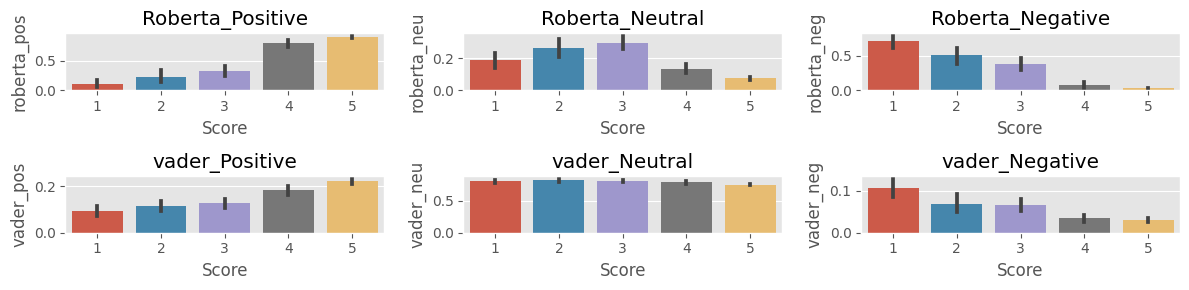

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 3))
sns.barplot(data=result, x='Score', y='roberta_pos', ax=axs[0][0])
sns.barplot(data=result, x='Score', y='roberta_neu', ax=axs[0][1])
sns.barplot(data=result, x='Score', y='roberta_neg', ax=axs[0][2])
sns.barplot(data=result, x='Score', y='vader_pos', ax=axs[1][0])
sns.barplot(data=result, x='Score', y='vader_neu', ax=axs[1][1])
sns.barplot(data=result, x='Score', y='vader_neg', ax=axs[1][2])
axs[0][0].set_title('Roberta_Positive')
axs[0][1].set_title('Roberta_Neutral')
axs[0][2].set_title('Roberta_Negative')
axs[1][0].set_title('vader_Positive')
axs[1][1].set_title('vader_Neutral')
axs[1][2].set_title('vader_Negative')
plt.tight_layout()
plt.show()